In [3]:
#normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

#import stats from numpy
from scipy import stats

#plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
dataset = randn(25)

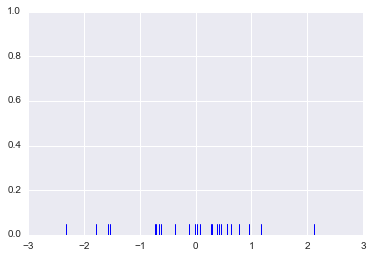

In [10]:
sns.rugplot(dataset)

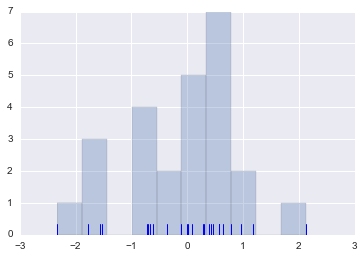

In [12]:
plt.hist(dataset, alpha = 0.3)
sns.rugplot(dataset)

(0, 1)

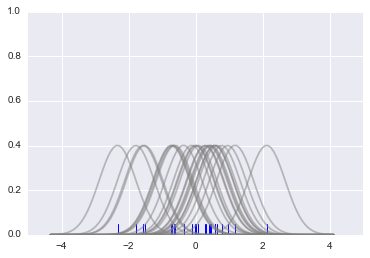

In [14]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

#practical estimation of the bandwith

bandwidth = ((4*dataset.std()**5)/(3*len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:
    
    # create a kernel for each point and append it to the kernel_list
    
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # scale for plotting
    
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color = 'grey', alpha = 0.5)
    
plt.ylim(0,1)

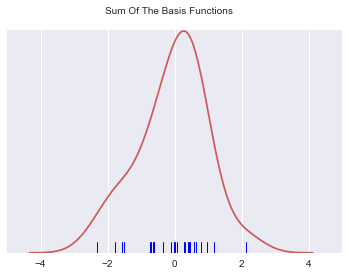

In [15]:
sum_of_kde = np.sum(kernel_list, axis = 0)

fig = plt.plot(x_axis, sum_of_kde, color = 'indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum Of The Basis Functions") #sum all gaussian basis functions

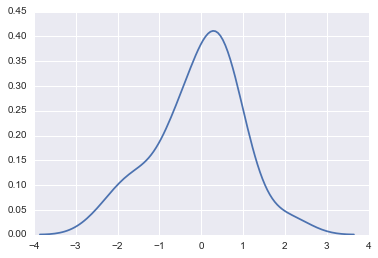

In [17]:
# above is manual way
# now with seaborn, do like automatic

sns.kdeplot(dataset) # :D

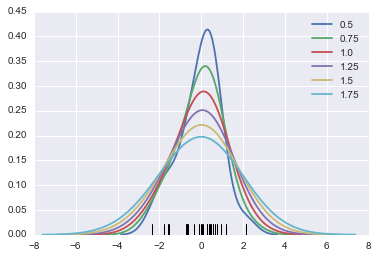

In [25]:
sns.rugplot(dataset, color = 'black')
for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw=bw, lw=1.8, label=bw) #lw kalınlık veriyor grafiğe, label sağ yukarısı

In [26]:
# kernel and kernel functions are for understanding similarities between points etc.

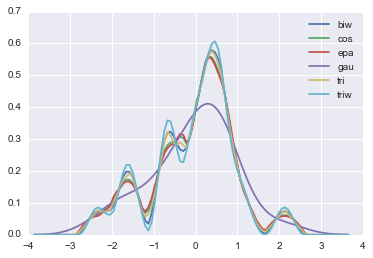

In [48]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern) #normally shade = false

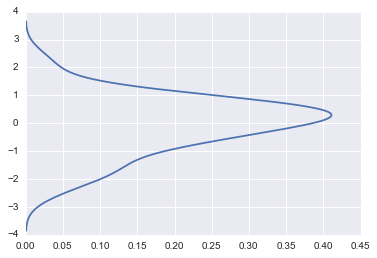

In [30]:
sns.kdeplot(dataset,vertical=True)

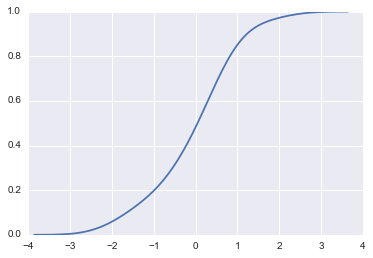

In [33]:
#we can use kdeplot to create CDF

sns.kdeplot(dataset, cumulative = True)

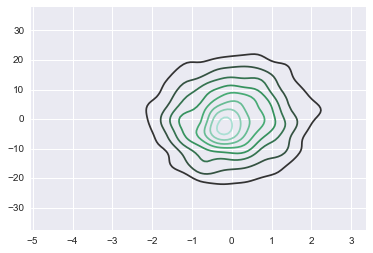

In [40]:
mean = [0,0]

cov = [[1,0], [0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)
dframe = pd.DataFrame(dataset2, columns = ['X', 'Y'])
sns.kdeplot(dframe)

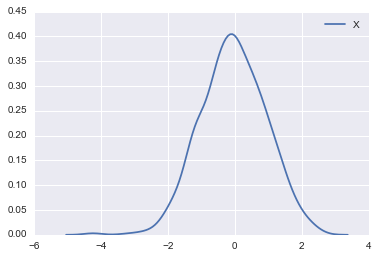

In [42]:
sns.kdeplot(dframe.X)

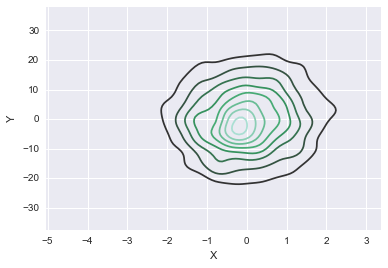

In [43]:
sns.kdeplot(dframe.X, dframe.Y)

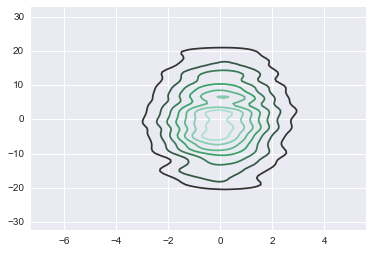

In [44]:
sns.kdeplot(dframe,bw=1) #bw for deciding bandwith

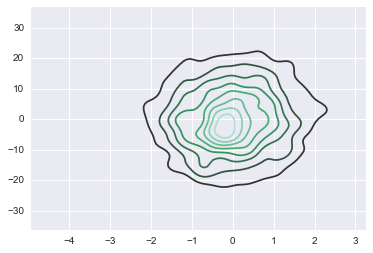

In [46]:
sns.kdeplot(dframe, bw = 'silverman') #silverman is a type of bandwith

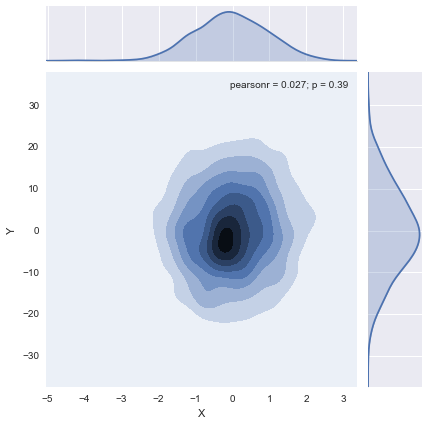

In [52]:
sns.jointplot('X', 'Y', dframe, kind = 'kde')